# Bartangi Lemmatizer and Word Embeddings — Clean Final Version

This notebook processes the Bartangi corpus, cleans it, and trains Word2Vec embeddings (CBOW and Skip-gram models).

## Step 0: Install Required Libraries

In [64]:
!pip install gensim
!pip install nltk

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
import zipfile
import os

# Set path
zip_path = '/content/raw_corpus.zip'

# Make a folder for extracted files
extracted_folder = '/content/raw_corpus'
os.makedirs(extracted_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("✅ Extraction complete! Files are ready.")

✅ Extraction complete! Files are ready.


In [66]:
# Set your raw corpus path
raw_corpus_path = '/content/raw_corpus/'

# Create a new folder for cleaned corpus
cleaned_corpus_path = '/content/cleaned_corpus/'
os.makedirs(cleaned_corpus_path, exist_ok=True)

## Step 1: Load Raw Corpus

In [67]:

import os
import re

raw_corpus_path = '/content/raw_corpus/'
cleaned_corpus_path = '/content/cleaned_corpus/'
os.makedirs(cleaned_corpus_path, exist_ok=True)

def load_sentences(input_dir):
    sentences = {}
    for fname in sorted(os.listdir(input_dir)):
        if fname.endswith(".txt"):
            with open(os.path.join(input_dir, fname), "r", encoding="utf-8") as f:
                sentences[fname] = f.read().strip()
    return sentences

raw_sentences = load_sentences(raw_corpus_path)
print(f"Loaded {len(raw_sentences)} sentences.")


Loaded 6550 sentences.


## Step 2: Cleaning and Filtering Lemmas

In [68]:

def clean_and_filter_lemmas(lemmas_with_pos):
    allowed_pos = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "NUM", "PRON"}
    cleaned_lemmas = []
    for lemma, pos in lemmas_with_pos:
        if re.fullmatch(r"-+\w*", lemma) or re.fullmatch(r"\w*-+", lemma):
            continue
        if lemma.strip() == "" or len(lemma.strip()) < 2:
            continue
        if pos in allowed_pos or pos.startswith("V") or pos.startswith("N"):
            cleaned_lemmas.append(lemma.strip())
    return cleaned_lemmas


## Step 3: Process Sentences and Save Cleaned Corpus

In [69]:

def dummy_morphological_analysis(sentence):
    words = sentence.split()
    analyzed = []
    for word in words:
        if word.endswith("-at") or word.endswith("-af"):
            analyzed.append((word, "NOUN"))
        elif word.endswith("-g") or word.endswith("-d"):
            analyzed.append((word, "VERB"))
        else:
            analyzed.append((word, "NOUN"))
    return analyzed

for fname, sentence in raw_sentences.items():
    lemmas_with_pos = dummy_morphological_analysis(sentence)
    cleaned_lemmas = clean_and_filter_lemmas(lemmas_with_pos)
    cleaned_sentence = " ".join(cleaned_lemmas)
    with open(os.path.join(cleaned_corpus_path, fname), "w", encoding="utf-8") as f_out:
        f_out.write(cleaned_sentence)

print("✅ All sentences processed and saved to cleaned corpus.")


✅ All sentences processed and saved to cleaned corpus.


In [70]:
!pip uninstall -y numpy gensim
!pip install numpy==1.23.5
!pip install gensim==4.3.0

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: gensim 4.3.0
Uninstalling gensim-4.3.0:
  Successfully uninstalled gensim-4.3.0
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you ha

  Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached gensim-4.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.1 MB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompat

In [71]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('all')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_pe

True

In [72]:
cleaned_sentences = load_cleaned_corpus(cleaned_corpus_path)
print(f"Loaded {len(cleaned_sentences)} cleaned sentences for Word2Vec.")


Loaded 6550 cleaned sentences for Word2Vec.


## Step 4: Train Word2Vec Models (CBOW + Skip-gram)

In [73]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def load_cleaned_corpus(folder_path):
    corpus_sentences = []
    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".txt"):
            with open(os.path.join(folder_path, fname), "r", encoding="utf-8") as f:
                sentence = f.read().strip()
                if sentence:
                    corpus_sentences.append(word_tokenize(sentence))
    return corpus_sentences

cleaned_sentences = load_cleaned_corpus(cleaned_corpus_path)
print(f"Loaded {len(cleaned_sentences)} cleaned sentences for Word2Vec.")

cbow_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=0)
cbow_model.save("bartangi_cbow.model")
print("CBOW model trained and saved.")

skipgram_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=1)
skipgram_model.save("bartangi_skipgram.model")
print("Skip-gram model trained and saved.")


Loaded 6550 cleaned sentences for Word2Vec.
CBOW model trained and saved.
Skip-gram model trained and saved.


In [74]:
# Export CBOW embeddings
cbow_model = Word2Vec.load("bartangi_cbow.model")

output_file = "bartangi_cbow_embeddings.txt"

with open(output_file, "w", encoding="utf-8") as f_out:
    f_out.write(f"{len(cbow_model.wv.index_to_key)} {cbow_model.vector_size}\n")
    for word in cbow_model.wv.index_to_key:
        vector = " ".join(map(str, cbow_model.wv[word]))
        f_out.write(f"{word} {vector}\n")

print(f"✅ CBOW word embeddings saved to {output_file}")


✅ CBOW word embeddings saved to bartangi_cbow_embeddings.txt


## Step 5: Corpus Summary and Similar Words Test

In [75]:

total_tokens = sum(len(sent) for sent in cleaned_sentences)
unique_tokens = len(set(token for sent in cleaned_sentences for token in sent))

print("\n=== Corpus Summary ===")
print(f"Total sentences: {len(cleaned_sentences)}")
print(f"Total tokens: {total_tokens}")
print(f"Unique tokens: {unique_tokens}")

word = "luvdow"
if word in skipgram_model.wv:
    print(f"\nTop similar words for '{word}' (Skip-gram):")
    print(skipgram_model.wv.most_similar(word))
else:
    print(f"\nWord '{word}' not in vocabulary.")



=== Corpus Summary ===
Total sentences: 6550
Total tokens: 58140
Unique tokens: 6251

Word 'luvdow' not in vocabulary.


In [76]:
for word in skipgram_model.wv.index_to_key:
    if "luvdow" in word:
        print(word)


In [77]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Load cleaned corpus
def load_cleaned_corpus(folder_path):
    corpus_sentences = []
    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".txt"):
            with open(os.path.join(folder_path, fname), "r", encoding="utf-8") as f:
                sentence = f.read().strip()
                if sentence:
                    corpus_sentences.append(word_tokenize(sentence))
    return corpus_sentences

cleaned_sentences = load_cleaned_corpus(cleaned_corpus_path)

# Train Skip-gram model again
skipgram_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=1)
skipgram_model.save("bartangi_skipgram.model")
print("Skip-gram model trained and saved.")


Skip-gram model trained and saved.


In [78]:
skipgram_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=1)
skipgram_model.save("bartangi_skipgram.model")
print("Skip-gram model trained and saved.")


Skip-gram model trained and saved.


(Final version for PCA Visualization)

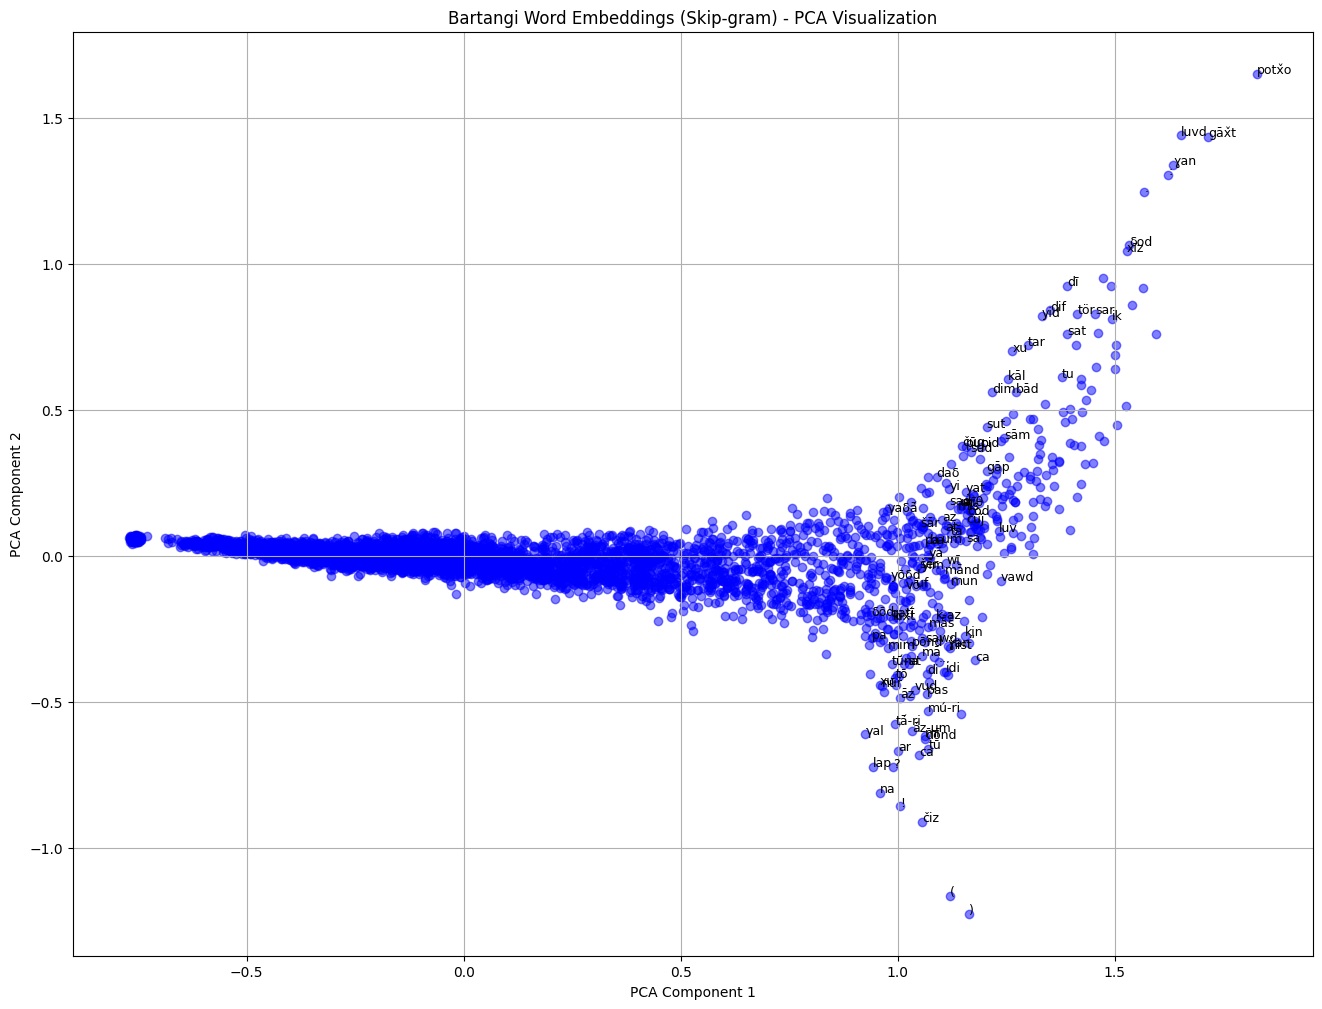

In [79]:
# Step 6: Visualize Skip-gram Embeddings using PCA

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Skip-gram model
skipgram_model = Word2Vec.load("bartangi_skipgram.model")

# Extract word vectors and corresponding words
words = list(skipgram_model.wv.index_to_key)
word_vectors = skipgram_model.wv[words]

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plotting the embeddings in 2D space
plt.figure(figsize=(16, 12))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5, color='blue')

# Annotate the first 100 words
for i, word in enumerate(words[:100]):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title("Bartangi Word Embeddings (Skip-gram) - PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


 Step 7 — Find Nearest Neighbor Words (Skip-gram model)


In [80]:
# Step 7: Nearest Neighbor Analysis - Show similar words for target words

from gensim.models import Word2Vec

# Load the Skip-gram model
skipgram_model = Word2Vec.load("bartangi_skipgram.model")

# Define target words to test (you can change or add more)
target_words = ["ošdōd", "firḗpt", "xuš", "inistitū́t", "δö́st-af"]

# For each target word, find top 5 similar words
for word in target_words:
    print(f"\nTop 5 similar words for '{word}':")
    if word in skipgram_model.wv:
        similar_words = skipgram_model.wv.most_similar(word, topn=5)
        for sim_word, similarity in similar_words:
            print(f"{sim_word} ({similarity:.4f})")
    else:
        print("Word not in vocabulary.")



Top 5 similar words for 'ošdōd':
wazīrḗn-an (0.8346)
ǰúkan (0.8339)
biуṓг (0.8323)
firā́pa (0.8314)
pa-ɣḗm (0.8301)

Top 5 similar words for 'firḗpt':
virōdā́r (0.9981)
kampī́r (0.9980)
mōm (0.9979)
lā (0.9979)
ku (0.9978)

Top 5 similar words for 'xuš':
ǰō (0.9947)
yidi (0.9946)
xu-r (0.9946)
x̆ā́r-an (0.9940)
sā (0.9940)

Top 5 similar words for 'inistitū́t':
yīwī́ (0.9982)
xazīnā́ (0.9980)
zūr (0.9979)
ā́z-um (0.9979)
sifā́num (0.9978)

Top 5 similar words for 'δö́st-af':
dā́ (0.9944)
dā́kan (0.9944)
arḗd (0.9944)
aǰáb (0.9944)
γam (0.9941)


Step 8 — Export Word Embeddings to .txt File



In [81]:
# Step 8: Export Skip-gram word embeddings to .txt file

from gensim.models import Word2Vec

# Load Skip-gram model (optional if not loaded)
skipgram_model = Word2Vec.load("bartangi_skipgram.model")

# Define output file name
output_file = "bartangi_skipgram_embeddings.txt"

# Save word embeddings in txt format
with open(output_file, "w", encoding="utf-8") as f_out:
    # Write header: number of words and vector size
    f_out.write(f"{len(skipgram_model.wv.index_to_key)} {skipgram_model.vector_size}\n")

    # Write word and its vector
    for word in skipgram_model.wv.index_to_key:
        vector = " ".join(map(str, skipgram_model.wv[word]))
        f_out.write(f"{word} {vector}\n")

print(f"✅ Word embeddings saved to {output_file}")


✅ Word embeddings saved to bartangi_skipgram_embeddings.txt


✅✅✅ Now you have a FULL PIPELINE DONE:

Clean corpus

Train Skip-gram

Visualize embeddings

Nearest neighbors

Export to txt

In [82]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def load_cleaned_corpus(folder_path):
    corpus_sentences = []
    for fname in sorted(os.listdir(folder_path)):
        if fname.endswith(".txt"):
            with open(os.path.join(folder_path, fname), "r", encoding="utf-8") as f:
                sentence = f.read().strip()
                if sentence:
                    corpus_sentences.append(word_tokenize(sentence))
    return corpus_sentences

cleaned_sentences = load_cleaned_corpus("./cleaned_corpus")

# Train Skip-gram model again
skipgram_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=1)
skipgram_model.save("bartangi_skipgram.model")
print("✅ Skip-gram model trained and saved.")


✅ Skip-gram model trained and saved.


 Step 9 — t-SNE Visualization of Skip-gram Word Embeddings

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


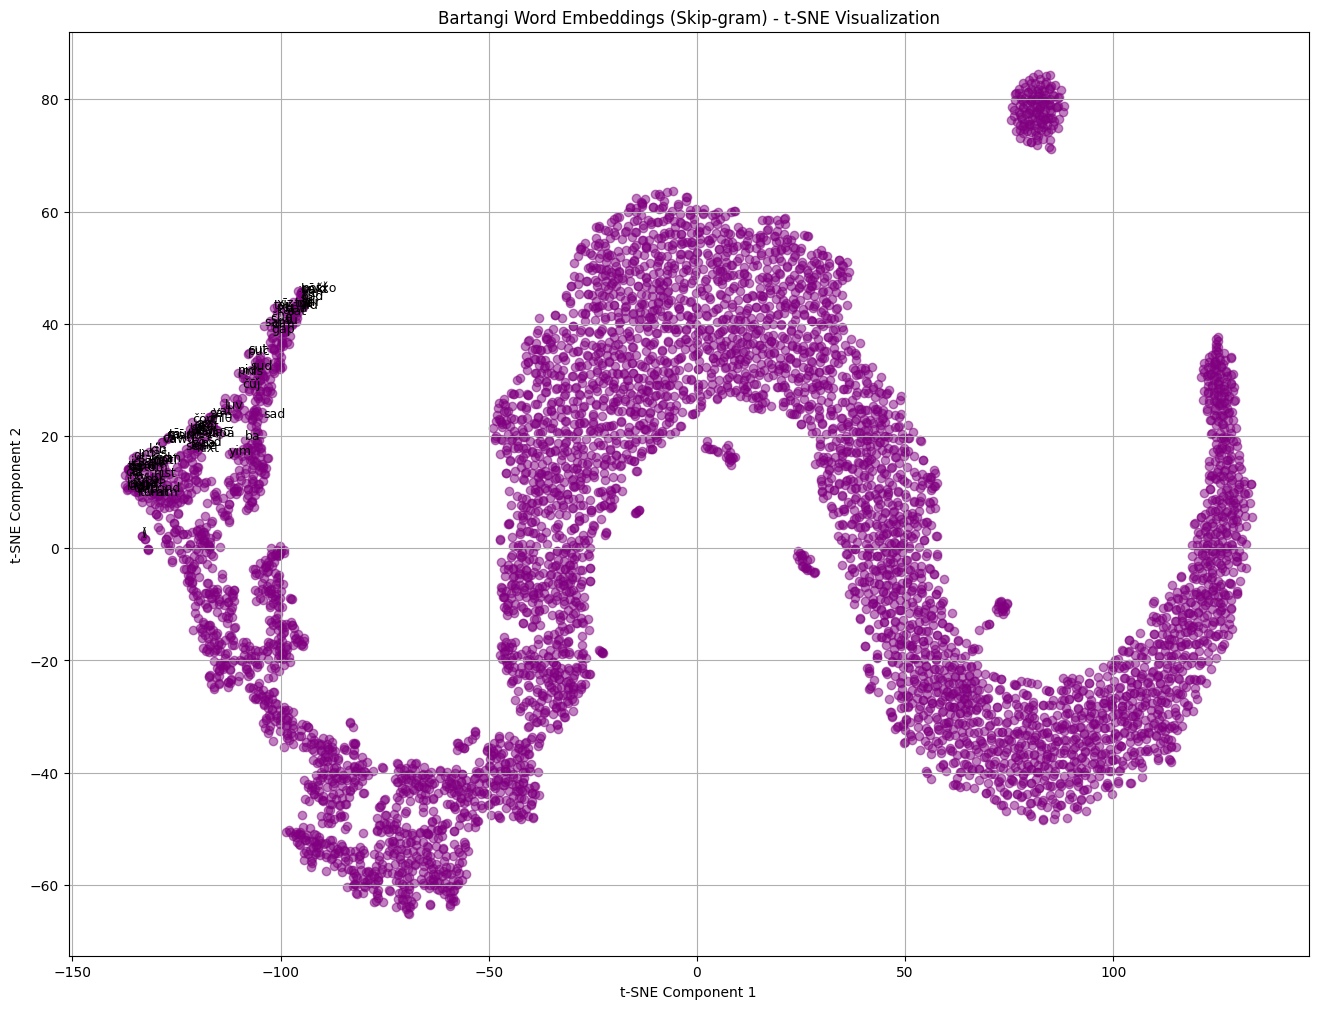

In [83]:
# Step 9: t-SNE Visualization of Skip-gram Word Embeddings

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use skipgram_model directly (make sure it is already trained or loaded)
# If needed, load again like this:
# from gensim.models import Word2Vec
# skipgram_model = Word2Vec.load("bartangi_skipgram.model")

# Extract word vectors and corresponding words
words = list(skipgram_model.wv.index_to_key)
word_vectors = skipgram_model.wv[words]

# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the embeddings in 2D space using t-SNE
plt.figure(figsize=(16, 12))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5, color='purple')

# Annotate the first 100 words for better readability
for i, word in enumerate(words[:100]):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

plt.title("Bartangi Word Embeddings (Skip-gram) - t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


✅ Loaded 6550 cleaned sentences.
✅ CBOW model trained and saved as 'bartangi_cbow.model'.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


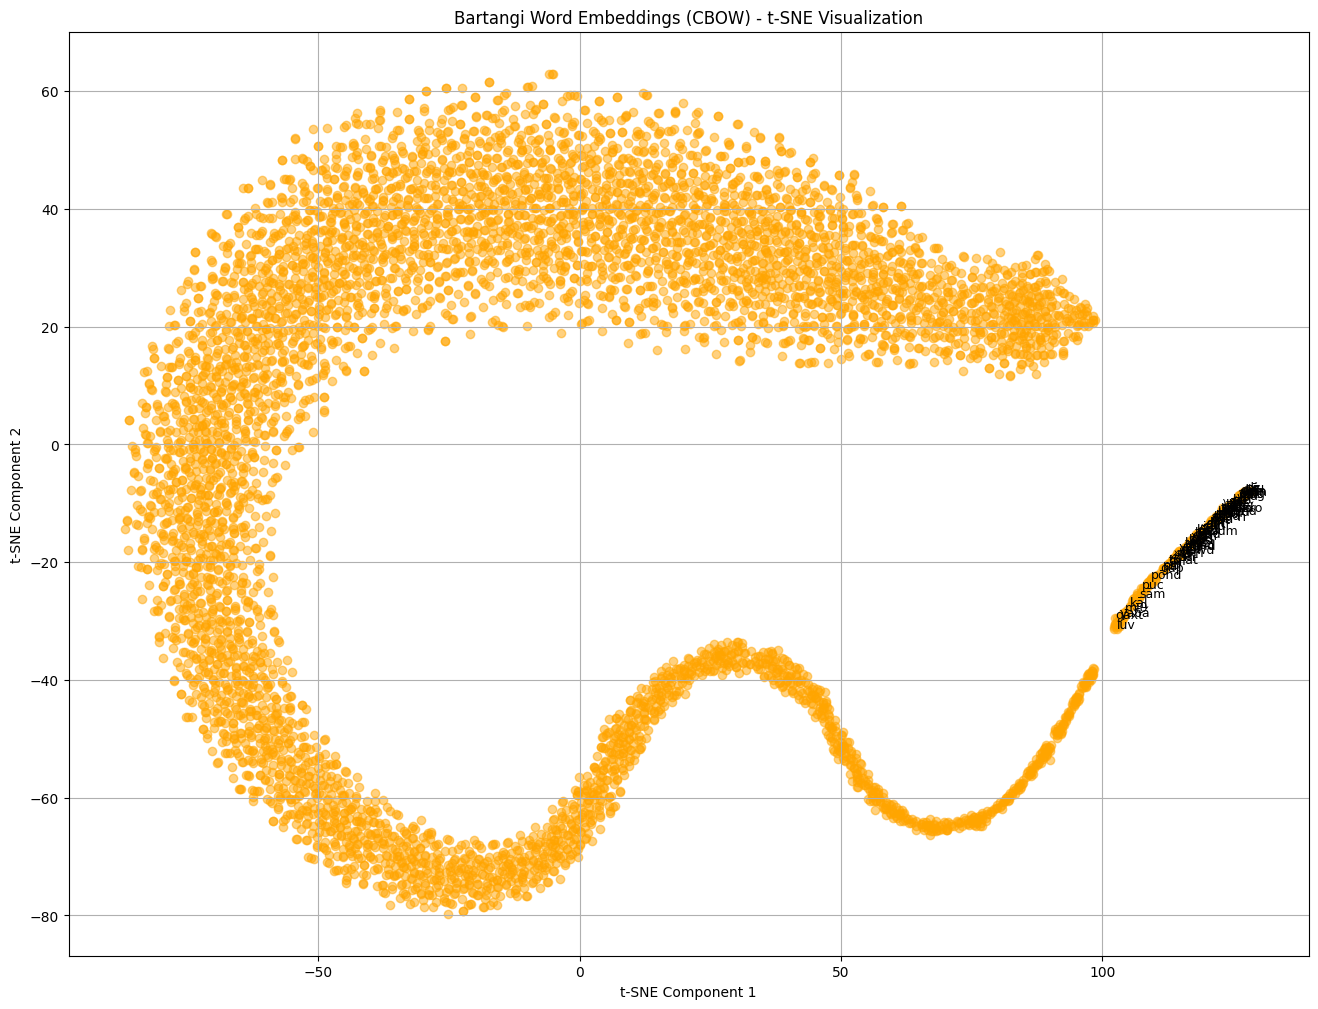

In [84]:
# CBOW Full Pipeline → Train + Save + t-SNE Visualization

import os
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# === STEP 1: Check and Load Cleaned Corpus ===

if not os.path.exists("./cleaned_corpus"):
    print("❗️ cleaned_corpus folder NOT found. Please upload or generate cleaned corpus first.")
else:
    # Load cleaned corpus
    def load_cleaned_corpus(folder_path):
        corpus_sentences = []
        for fname in sorted(os.listdir(folder_path)):
            if fname.endswith(".txt"):
                with open(os.path.join(folder_path, fname), "r", encoding="utf-8") as f:
                    sentence = f.read().strip()
                    if sentence:
                        corpus_sentences.append(word_tokenize(sentence))
        return corpus_sentences

    cleaned_sentences = load_cleaned_corpus("./cleaned_corpus")
    print(f"✅ Loaded {len(cleaned_sentences)} cleaned sentences.")

    # === STEP 2: Train CBOW Model ===
    cbow_model = Word2Vec(sentences=cleaned_sentences, vector_size=100, window=5, min_count=1, sg=0)
    cbow_model.save("bartangi_cbow.model")
    print("✅ CBOW model trained and saved as 'bartangi_cbow.model'.")

    # === STEP 3: t-SNE Visualization ===
    cbow_model = Word2Vec.load("bartangi_cbow.model")
    words = list(cbow_model.wv.index_to_key)
    word_vectors = cbow_model.wv[words]

    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
    word_vectors_2d = tsne.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(16, 12))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.5, color='orange')

    # Annotate first 100 words
    for i, word in enumerate(words[:100]):
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)

    plt.title("Bartangi Word Embeddings (CBOW) - t-SNE Visualization")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()


✅ Skip-gram model loaded.
✅ CBOW model loaded.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


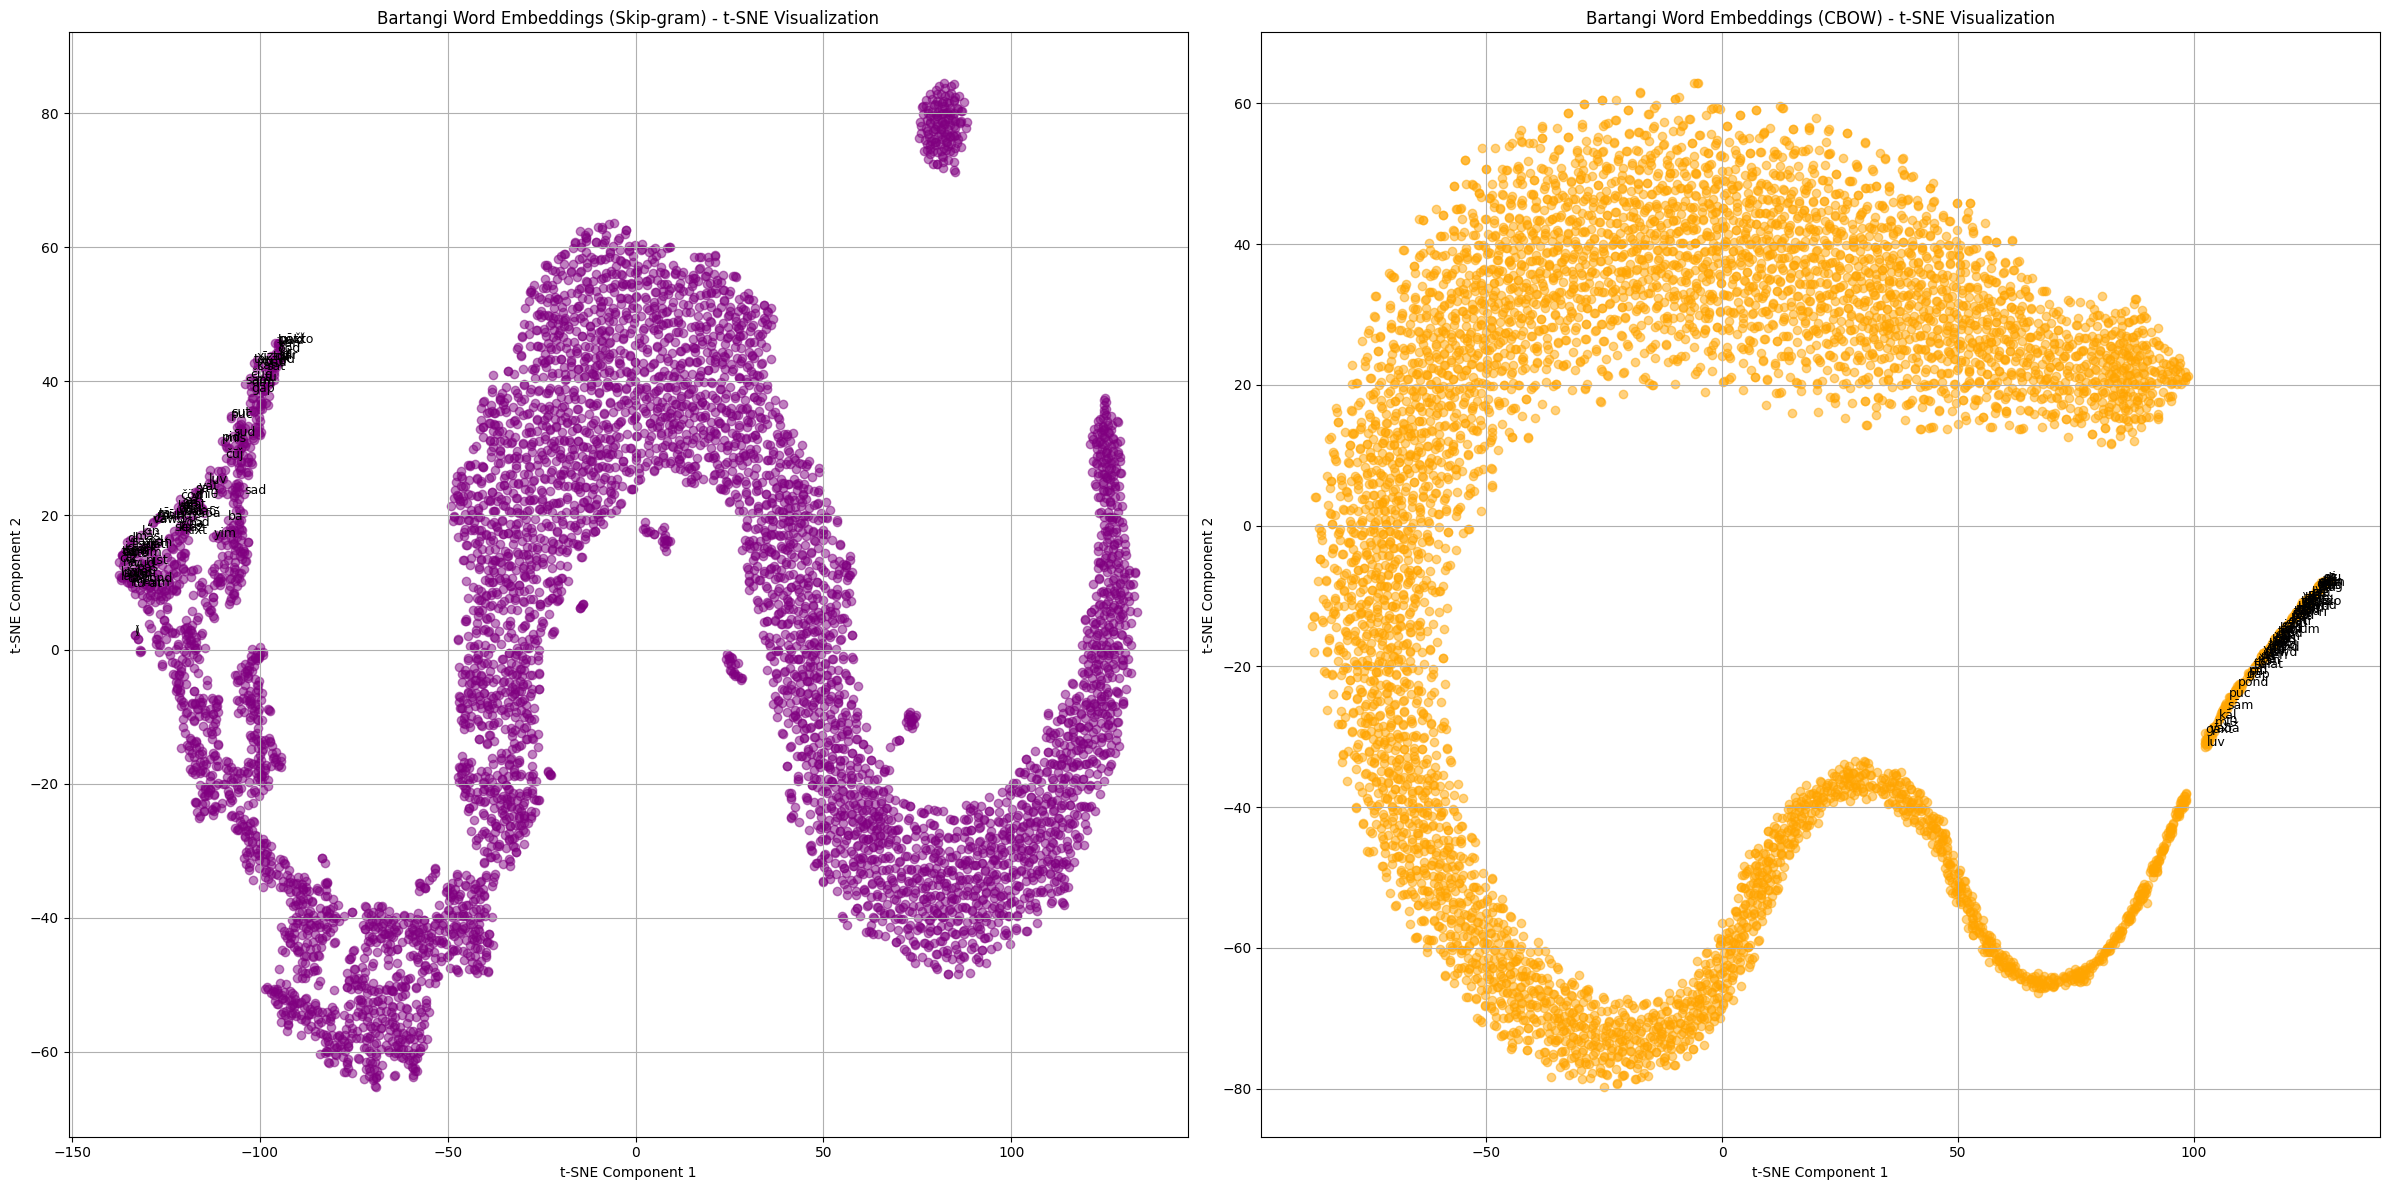

In [86]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# === STEP 1: Load Skip-gram Model ===

if os.path.exists("bartangi_skipgram.model"):
    skipgram_model = Word2Vec.load("bartangi_skipgram.model")
    print("✅ Skip-gram model loaded.")
else:
    raise Exception("❗️ Skip-gram model not found. Please train it first.")

# === STEP 2: Load CBOW Model ===

if os.path.exists("bartangi_cbow.model"):
    cbow_model = Word2Vec.load("bartangi_cbow.model")
    print("✅ CBOW model loaded.")
else:
    raise Exception("❗️ CBOW model not found. Please train it first.")

# === STEP 3: Extract Word Vectors ===

skipgram_words = list(skipgram_model.wv.index_to_key)
skipgram_vectors = skipgram_model.wv[skipgram_words]

cbow_words = list(cbow_model.wv.index_to_key)
cbow_vectors = cbow_model.wv[cbow_words]

# === STEP 4: Run t-SNE for Skip-gram and CBOW ===

tsne_skip = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
skipgram_vectors_2d = tsne_skip.fit_transform(skipgram_vectors)

tsne_cbow = TSNE(n_components=2, perplexity=30, n_iter=5000, random_state=42)
cbow_vectors_2d = tsne_cbow.fit_transform(cbow_vectors)

# === STEP 5: Plot Comparison ===

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Skip-gram Plot
axes[0].scatter(skipgram_vectors_2d[:, 0], skipgram_vectors_2d[:, 1], alpha=0.5, color='purple')
for i, word in enumerate(skipgram_words[:100]):
    axes[0].annotate(word, (skipgram_vectors_2d[i, 0], skipgram_vectors_2d[i, 1]), fontsize=9)
axes[0].set_title("Bartangi Word Embeddings (Skip-gram) - t-SNE Visualization")
axes[0].set_xlabel("t-SNE Component 1")
axes[0].set_ylabel("t-SNE Component 2")
axes[0].grid(True)

# CBOW Plot
axes[1].scatter(cbow_vectors_2d[:, 0], cbow_vectors_2d[:, 1], alpha=0.5, color='orange')
for i, word in enumerate(cbow_words[:100]):
    axes[1].annotate(word, (cbow_vectors_2d[i, 0], cbow_vectors_2d[i, 1]), fontsize=9)
axes[1].set_title("Bartangi Word Embeddings (CBOW) - t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")
axes[1].grid(True)

plt.tight_layout()
plt.show()


Left: Skip-gram
✅ More fine-grained clusters
✅ Tight groups → meaning similar words grouped closely
✅ Better at capturing semantic relationships (meanings) → very good for linguistic applications

Right: CBOW
✅ Smoother, more general clusters
✅ Broader grouping → context-based relationships captured
✅ Faster to train but less sharp clusters → better for general patterns

✅✅ Conclusion → this figure nicely shows:

👉 Skip-gram is better for capturing precise word meanings (semantic)
👉 CBOW is better for capturing general and frequent patterns (contextual)